In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from utils import *

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


#### The purpose of this notebook is to evaluate the performance of the pre-trained DNN decoder on the preJumper Running task.

## rat1
load the model built for Jumper task, test using part of the Running task data 

In [2]:
model, neuron_idx, B_bins = load_pretrained_model(rat='rat1', task='Jumper')
model.cuda();

In [3]:
# load model that you trained offline and saved
# model.load_state_dict(torch.load('./pretrained_model/wr112_0905_offline_model_4.pth'))

In [4]:
# load test_PV (input) and test_pos (output)
test_PV = np.load('./data/Running/jumper_after_run/wr112_0905_test_PV.npy')
test_pos = np.load('./data/Running/jumper_after_run/wr112_0905_test_pos.npy')

In [5]:
# decode and calculate r2 score
test_dec_pos = model.predict(test_PV, smooth=True)
r2_rat1 = r2_score(test_pos, test_dec_pos)

In [7]:
print(r2_rat1)

0.7763206880736365


## Rat 2
load the model built for Jumper task, test using part of the Running task data

In [10]:
model, neuron_idx, B_bins = load_pretrained_model(rat='rat2', task='Jumper')
model.cuda();

In [11]:
# load test_PV (input) and test_pos (output)
test_PV = np.load('./data/Running/jumper_after_run/wr118_0821_test_PV.npy')
test_pos = np.load('./data/Running/jumper_after_run/wr118_0821_test_pos.npy')

In [12]:
# decode and calculate r2 score
test_dec_pos = model.predict(test_PV, smooth=True)
r2_rat2 = r2_score(test_pos, test_dec_pos)

## Rat 3
load the model built for Jumper task, test using part of the Running task data

In [13]:
model, neuron_idx, B_bins = load_pretrained_model(rat='rat3', task='Jumper')
model.cuda();

In [14]:
test_PV = np.load('./data/Running/jumper_after_run/wr121_0927_test_PV.npy')
test_pos = np.load('./data/Running/jumper_after_run/wr121_0927_test_pos.npy')

In [15]:
test_dec_pos = model.predict(test_PV, smooth=True)
r2_rat3 = r2_score(test_pos, test_dec_pos)

### plot $R^2$ score

In [16]:
# as we used a different smoothing method, the score is slightly different from the paper (0.78-0.88)
r2_rat1, r2_rat2, r2_rat3

(7.763206880736365e-01, 0.9021522429874862, 0.8145935911392542)

In [17]:
mean_r2 = np.mean([r2_rat1, r2_rat2, r2_rat3])

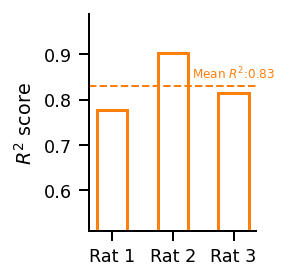

In [19]:
fig, ax = plt.subplots(1,1,figsize=(1.5,2))
plt.bar(np.arange(3), [r2_rat1, r2_rat2, r2_rat3], align='center', edgecolor='C1', lw=1.5, width=0.5,fill=False)
plt.xticks(np.arange(3), ['Rat 1', 'Rat 2', 'Rat 3']);
plt.ylim([0.51, 0.99]);
plt.ylabel('$R^2$ score');
sns.despine(ax=ax, right=True, top=True)
plt.axhline(np.mean([r2_rat1, r2_rat2, r2_rat3]), color='C1', ls='--', lw=1);
# put text of mean value on top of the line
plt.text(2, np.mean([r2_rat1, r2_rat2, r2_rat3])+0.01, f'Mean $R^2$:{mean_r2:.2f}', ha='center', va='bottom', color='C1', fontsize=6);